# Analysing lyrics through the decades

### First import the data that has already been scraped, looked up and tidied

In [182]:
import pickle, re, pandas as pd
with open('final_lyrics_dump.pickle', 'rb') as lyrics_file:
    lyrics_array = pickle.load(lyrics_file)

df = pd.DataFrame.from_records(lyrics_array)
#getting rid of the descriptions of verses and choruses in the lyrics
df["Lyrics"] = df.apply(lambda x: re.sub(r'\[[^\]]*\]', '', x["Lyrics"]), axis=1)
#getting rid of the newlines in the lyrics
df["Just Lyrics"] = df.apply(lambda x: re.sub(r'\n', ' ', x["Lyrics"]), axis=1)
#getting rid of the punctuation in the lyrics
df["Just Lyrics"] = df.apply(lambda x: re.sub(r'[^\w\s]', '', x["Just Lyrics"]), axis=1)
#making the lyrics lowercase in a new column (in case I need case later)
df["Just Lower Lyrics"] = df.apply(lambda x: x["Just Lyrics"].lower(), axis=1)
df["Lyrics List"] = df.apply(lambda x: x["Just Lower Lyrics"].split(), axis=1)
df.head(10)

,Song title,Artist,Year,Lyrics,Just Lyrics,Just Lower Lyrics,Lyrics List
0,Poor Little Fool,Ricky Nelson,1958,I used to play around with hearts\nThat hasten...,I used to play around with hearts That hastene...,i used to play around with hearts that hastene...,"[i, used, to, play, around, with, hearts, that..."
1,Volare (Nel blu dipinto di blu),Domenico Modugno,1958,\n\n\nPenso che un sogno così non ritorni mai ...,Penso che un sogno così non ritorni mai più...,penso che un sogno così non ritorni mai più...,"[penso, che, un, sogno, così, non, ritorni, ma..."
2,Little Star,The Elegants,1958,Where are you little star?\n(Where are you?)\n...,Where are you little star Where are you Whoa ...,where are you little star where are you whoa ...,"[where, are, you, little, star, where, are, yo..."
3,It's All in the Game,Tommy Edwards,1958,Many a tear have to fall\nBut it's all in the ...,Many a tear have to fall But its all in the ga...,many a tear have to fall but its all in the ga...,"[many, a, tear, have, to, fall, but, its, all,..."
4,It's Only Make Believe,Conway Twitty,1958,People see us everywhere\nThey think you reall...,People see us everywhere They think you really...,people see us everywhere they think you really...,"[people, see, us, everywhere, they, think, you..."
5,Tom Dooley,The Kingston Trio,1958,"\nThroughout history, there have been many son...",Throughout history there have been many songs...,throughout history there have been many songs...,"[throughout, history, there, have, been, many,..."
6,To Know Him Is to Love Him,The Teddy Bears,1958,"\nTo know, know, know him\nIs to love, love, l...",To know know know him Is to love love love hi...,to know know know him is to love love love hi...,"[to, know, know, know, him, is, to, love, love..."
7,Smoke Gets in Your Eyes,The Platters,1959,\nThey asked me how I knew\nMy true love was t...,They asked me how I knew My true love was tru...,they asked me how i knew my true love was tru...,"[they, asked, me, how, i, knew, my, true, love..."
8,Stagger Lee,Lloyd Price,1959,The night was clear and the moon was yellow\nA...,The night was clear and the moon was yellow An...,the night was clear and the moon was yellow an...,"[the, night, was, clear, and, the, moon, was, ..."
9,Venus,Frankie Avalon,1959,"\nHey, Venus!\nOh, Venus!\n\n\nVenus! If you w...",Hey Venus Oh Venus Venus If you will Please...,hey venus oh venus venus if you will please...,"[hey, venus, oh, venus, venus, if, you, will, ..."


### Make the counts of words


In [183]:
def word_count(row):
    # Count the Number of Occurrences in a Python list using Counter
    lyrics_list = row["Lyrics List"]
    from collections import Counter
    lyric_count_dict = Counter(lyrics_list)
    return lyric_count_dict

df["Lyrics Count"] = df.apply(word_count, axis=1)
df.sample(10)

,Song title,Artist,Year,Lyrics,Just Lyrics,Just Lower Lyrics,Lyrics List,Lyrics Count
417,Three Times a Lady,Commodores,1978,\nThanks for the times that you've given me\nT...,Thanks for the times that youve given me The ...,thanks for the times that youve given me the ...,"[thanks, for, the, times, that, youve, given, ...","{'thanks': 1, 'for': 2, 'the': 4, 'times': 8, ..."
776,I'm Your Angel,R. Kelly & Céline Dion,1998,"\nNo mountains too high, for you to climb\nAll...",No mountains too high for you to climb All yo...,no mountains too high for you to climb all yo...,"[no, mountains, too, high, for, you, to, climb...","{'no': 11, 'mountains': 1, 'too': 2, 'high': 1..."
974,This Is Why I'm Hot,Mims,2007,"\nThis is why I'm hot (Hot!), this is why I'm ...",This is why Im hot Hot this is why Im hot Hot...,this is why im hot hot this is why im hot hot...,"[this, is, why, im, hot, hot, this, is, why, i...","{'this': 68, 'is': 68, 'why': 67, 'im': 58, 'h..."
362,Saturday Night,Bay City Rollers,1976,S-A-T-U-R-D-A-Y night!\nS-A-T-U-R-D-A-Y night!...,SATURDAY night SATURDAY night SATURDAY night S...,saturday night saturday night saturday night s...,"[saturday, night, saturday, night, saturday, n...","{'saturday': 30, 'night': 44, 'gonna': 6, 'kee..."
93,I'm Leaving It Up to You,Dale & Grace,1963,I'm leavin' it all up to you oh oh\nYou decide...,Im leavin it all up to you oh oh You decide wh...,im leavin it all up to you oh oh you decide wh...,"[im, leavin, it, all, up, to, you, oh, oh, you...","{'im': 3, 'leavin': 2, 'it': 3, 'all': 1, 'up'..."
444,Babe,Styx,1979,"\nBabe, I'm leaving\nI must be on my way\nThe ...",Babe Im leaving I must be on my way The time ...,babe im leaving i must be on my way the time ...,"[babe, im, leaving, i, must, be, on, my, way, ...","{'babe': 10, 'im': 2, 'leaving': 2, 'i': 11, '..."
33,Mr. Custer,Larry Verne,1960,In alphabetical order by title:\n\n(Can't find...,In alphabetical order by title Cant find your...,in alphabetical order by title cant find your...,"[in, alphabetical, order, by, title, cant, fin...","{'in': 10, 'alphabetical': 1, 'order': 1, 'by'..."
42,Surrender,Elvis Presley,1961,"\nWhen we kiss, my heart's on fire\nBurning wi...",When we kiss my hearts on fire Burning with a...,when we kiss my hearts on fire burning with a...,"[when, we, kiss, my, hearts, on, fire, burning...","{'when': 1, 'we': 1, 'kiss': 2, 'my': 3, 'hear..."
953,Don't Forget About Us,Mariah Carey,2005,"\n(Don't forget about us)\nDon't baby, don't b...",Dont forget about us Dont baby dont baby dont...,dont forget about us dont baby dont baby dont...,"[dont, forget, about, us, dont, baby, dont, ba...","{'dont': 30, 'forget': 16, 'about': 21, 'us': ..."
491,Every Breath You Take,The Police,1983,\nEvery breath you take\nAnd every move you ma...,Every breath you take And every move you make...,every breath you take and every move you make...,"[every, breath, you, take, and, every, move, y...","{'every': 55, 'breath': 3, 'you': 70, 'take': ..."


In [184]:
import spacy

In [185]:
#keeping track of how many times I've run this function
import math
counter = 0

def syllable_count(word):
    #thank you to Michael Holtzscher https://medium.com/@mholtzscher/programmatically-counting-syllables-ca760435fab4
    syllable_count = 0
    vowels = 'aeiouy'
    if word[0] in vowels:
        syllable_count += 1
    for index in range(1, len(word)):
        if word[index] in vowels and word[index - 1] not in vowels:
            syllable_count += 1
    if word.endswith('e'):
        syllable_count -= 1
    if word.endswith('le') and len(word) > 2 and word[-3] not in vowels:
        syllable_count += 1
    if syllable_count == 0:
        syllable_count += 1
    return syllable_count

def get_sentences(row):
    nlp = spacy.load('en_core_web_sm')
    lyrics = nlp(row["Lyrics"])
    return len(list(lyrics.sents))

def get_sentences_alt(row):
    #if the spacy sentence finder does't work, use this as an approximation, number of lines divided by 2
    return math.ceil(len(row["Lyrics"].split("\n"))/2)

def get_words(row):
    return len(row["Lyrics List"])

def get_syllables(row):
    syllables = 0
    words = row["Lyrics List"]
    for word in words:
        syllables += syllable_count(word)
    return syllables

def reading_age_FK(row):
    #Flesch Kincade calculation 
    #Formula 206.835 − 1.015*(total words/total sentences) − 84.6*(total syllables/total words)
    #https://en.wikipedia.org/wiki/Flesch%E2%80%93Kincaid_readability_tests
    global counter
    counter += 1
    print(counter)
    words = get_words(row)
    sentences = get_sentences_alt(row)
    return 206.35 - 1.015*(words/sentences) - 84.6*(get_syllables(row)/words)



In [186]:
df["Reading Age"] = df.apply(reading_age_FK, axis=1)
df.sample(10)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


,Song title,Artist,Year,Lyrics,Just Lyrics,Just Lower Lyrics,Lyrics List,Lyrics Count,Reading Age
161,96 Tears,? & the Mysterians,1966,Too many teardrops\nFor one heart to be cryin'...,Too many teardrops For one heart to be cryin T...,too many teardrops for one heart to be cryin t...,"[too, many, teardrops, for, one, heart, to, be...","{'too': 4, 'many': 4, 'teardrops': 4, 'for': 5...",100.735429
401,Undercover Angel,Alan O'Day,1977,"\nYeah, yeah\nRight\n\n\nCryin' on my pillow, ...",Yeah yeah Right Cryin on my pillow lonely i...,yeah yeah right cryin on my pillow lonely i...,"[yeah, yeah, right, cryin, on, my, pillow, lon...","{'yeah': 3, 'right': 3, 'cryin': 1, 'on': 1, '...",75.596955
932,This Is the Night,Clay Aiken,2003,\nWhen the world wasn't upside down\nI could t...,When the world wasnt upside down I could take...,when the world wasnt upside down i could take...,"[when, the, world, wasnt, upside, down, i, cou...","{'when': 3, 'the': 11, 'world': 1, 'wasnt': 1,...",97.570218
175,Groovin',The Young Rascals,1967,\n\nGroovin' on a Sunday afternoon\nReally cou...,Groovin on a Sunday afternoon Really couldnt...,groovin on a sunday afternoon really couldnt...,"[groovin, on, a, sunday, afternoon, really, co...","{'groovin': 4, 'on': 4, 'a': 5, 'sunday': 3, '...",83.514361
420,Kiss You All Over,Exile,1978,"When I get home, babe\nGonna light your fire\n...",When I get home babe Gonna light your fire All...,when i get home babe gonna light your fire all...,"[when, i, get, home, babe, gonna, light, your,...","{'when': 2, 'i': 12, 'get': 1, 'home': 1, 'bab...",94.087601
17,Mack the Knife,Bobby Darin,1959,"Oh the shark, babe, has such teeth, dear\nAnd ...",Oh the shark babe has such teeth dear And he s...,oh the shark babe has such teeth dear and he s...,"[oh, the, shark, babe, has, such, teeth, dear,...","{'oh': 3, 'the': 9, 'shark': 2, 'babe': 7, 'ha...",87.333863
600,The Way You Make Me Feel,Michael Jackson,1988,"\nHee-hee\nOoh\nG'on, girl!\nAaow!\nHee\n\n\nH...",Heehee Ooh Gon girl Aaow Hee Hey pretty bab...,heehee ooh gon girl aaow hee hey pretty bab...,"[heehee, ooh, gon, girl, aaow, hee, hey, prett...","{'heehee': 6, 'ooh': 2, 'gon': 7, 'girl': 9, '...",95.186535
291,Keep On Truckin',Eddie Kendricks,1973,\nOoh ...\nOoh ...\nOoh ...\n\n\nKeep on truck...,Ooh Ooh Ooh Keep on truckin baby I got t...,ooh ooh ooh keep on truckin baby i got t...,"[ooh, ooh, ooh, keep, on, truckin, baby, i, go...","{'ooh': 17, 'keep': 15, 'on': 23, 'truckin': 2...",94.664387
524,Everybody Wants to Rule the World,Tears for Fears,1985,\nWelcome to your life\nThere's no turning bac...,Welcome to your life Theres no turning back E...,welcome to your life theres no turning back e...,"[welcome, to, your, life, theres, no, turning,...","{'welcome': 1, 'to': 9, 'your': 3, 'life': 1, ...",80.810227
331,Please Mr. Postman,The Carpenters,1975,THAT evening James Bellingham came to see Core...,THAT evening James Bellingham came to see Core...,that evening james bellingham came to see core...,"[that, evening, james, bellingham, came, to, s...","{'that': 110, 'evening': 3, 'james': 2, 'belli...",37.417606


### Store processed data for later use.

In [187]:
#Make a pickle of the dataframe
with open('final_lyrics_dataframe.pickle', 'wb') as out_file:
    pickle.dump(df, out_file, protocol=pickle.HIGHEST_PROTOCOL)

### Check it on a graph

<AxesSubplot:xlabel='Year', ylabel='Reading Age'>

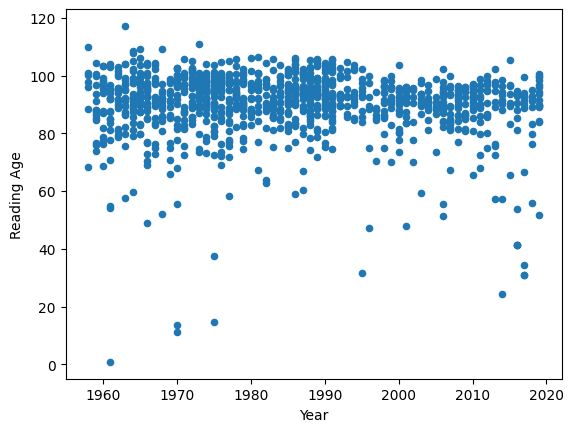

In [188]:
#Graph the dataframe by year and reading age
df.plot.scatter(x="Year", y="Reading Age")

In [189]:
df[df["Reading Age"].le(10)]

,Song title,Artist,Year,Lyrics,Just Lyrics,Just Lower Lyrics,Lyrics List,Lyrics Count,Reading Age
58,The Lion Sleeps Tonight,The Tokens,1961,"\nWeeheeheehee, dee heeheeheehee, weeoh aweem ...",Weeheeheehee dee heeheeheehee weeoh aweem awa...,weeheeheehee dee heeheeheehee weeoh aweem awa...,"[weeheeheehee, dee, heeheeheehee, weeoh, aweem...","{'weeheeheehee': 9, 'dee': 9, 'heeheeheehee': ...",0.830945


In [179]:
df[df["Reading Age"].ge(100)]

,Song title,Artist,Year,Lyrics,Just Lyrics,Just Lower Lyrics,Lyrics List,Lyrics Count,Reading Age
0,Poor Little Fool,Ricky Nelson,1958,I used to play around with hearts\nThat hasten...,I used to play around with hearts That hastene...,i used to play around with hearts that hastene...,"[i, used, to, play, around, with, hearts, that...","{'i': 18, 'used': 1, 'to': 2, 'play': 2, 'arou...",100.238120
2,Little Star,The Elegants,1958,Where are you little star?\n(Where are you?)\n...,Where are you little star Where are you Whoa ...,where are you little star where are you whoa ...,"[where, are, you, little, star, where, are, yo...","{'where': 5, 'are': 8, 'you': 9, 'little': 5, ...",100.742778
6,To Know Him Is to Love Him,The Teddy Bears,1958,"\nTo know, know, know him\nIs to love, love, l...",To know know know him Is to love love love hi...,to know know know him is to love love love hi...,"[to, know, know, know, him, is, to, love, love...","{'to': 14, 'know': 13, 'him': 15, 'is': 5, 'lo...",109.865745
9,Venus,Frankie Avalon,1959,"\nHey, Venus!\nOh, Venus!\n\n\nVenus! If you w...",Hey Venus Oh Venus Venus If you will Please...,hey venus oh venus venus if you will please...,"[hey, venus, oh, venus, venus, if, you, will, ...","{'hey': 2, 'venus': 10, 'oh': 2, 'if': 3, 'you...",100.470348
18,Mr. Blue,The Fleetwoods,1959,\nOur guardian star lost all his glow the day ...,Our guardian star lost all his glow the day t...,our guardian star lost all his glow the day t...,"[our, guardian, star, lost, all, his, glow, th...","{'our': 1, 'guardian': 1, 'star': 1, 'lost': 3...",104.506842
...,...,...,...,...,...,...,...,...,...
1044,Take On Me,a-ha,1985,\nWe're talking away\nI don't know what I'm to...,Were talking away I dont know what Im to say ...,were talking away i dont know what im to say ...,"[were, talking, away, i, dont, know, what, im,...","{'were': 1, 'talking': 1, 'away': 5, 'i': 1, '...",101.025319
1045,The Way It Is,Bruce Hornsby & the Range,1986,"\n\n\nStanding in line, marking time\nWaiting ...",Standing in line marking time Waiting for t...,standing in line marking time waiting for t...,"[standing, in, line, marking, time, waiting, f...","{'standing': 1, 'in': 3, 'line': 2, 'marking':...",103.822008
1049,To Be With You,Mr. Big,1991,"\nHold on, little girl\nShow me what he's done...",Hold on little girl Show me what hes done to ...,hold on little girl show me what hes done to ...,"[hold, on, little, girl, show, me, what, hes, ...","{'hold': 2, 'on': 16, 'little': 3, 'girl': 2, ...",102.636469
1053,My Heart Will Go On,Celine Dion,1995,"\nEvery night in my dreams\nI see you, I feel ...",Every night in my dreams I see you I feel you...,every night in my dreams i see you i feel you...,"[every, night, in, my, dreams, i, see, you, i,...","{'every': 1, 'night': 1, 'in': 5, 'my': 9, 'dr...",102.240000


In [190]:
#checking the reading age formula
row = df.iloc[0]
#print(row["Lyrics"])

print(reading_age_FK(row))
print(get_sentences(row))
print(get_sentences_alt(row))
print(get_words(row))
print(get_syllables(row))
print(row["Lyrics"])
print(row["Lyrics List"])
syllables = 0
words = row["Lyrics List"]
vowels = 'aeiouy'
for word in words:
    syllable_count = 0
    if word[0] in vowels:
        syllable_count += 1
    for index in range(1, len(word)):
        if word[index] in vowels and word[index - 1] not in vowels:
            syllable_count += 1
    if word.endswith('e'):
        syllable_count -= 1
    if word.endswith('le') and len(word) > 2 and word[-3] not in vowels:
        syllable_count += 1
    if syllable_count == 0:
        syllable_count += 1
    syllables += syllable_count
    print(word, syllable_count)
print(syllables)

1078
100.23812004611617
24
27
257
293
I used to play around with hearts
That hastened at my call
But when I met that little girl
I knew that I would fall

Poor little fool, oh yeah
I was a fool, uh huh
(Oh oh, poor little fool)
(I was a fool, oh yeah)

She played around and teased me
With her carefree devil eyes
She'd hold me close and kiss me
But her heart was full of lies

Poor little fool, oh yeah
I was a fool, uh huh
(Oh oh, poor little fool)
(I was a fool, oh yeah)

She told me how she cared for me
And that we'd never part
And so for the very first time
I gave away my heart

Poor little fool, oh yeah
I was a fool, uh huh
(Oh oh, poor little fool)
(I was a fool, oh yeah)
You might also likeThe next day she was gone
And I knew she'd lied to me
She left me with a broken heart
And won her victory

Poor little fool, oh yeah
I was a fool, uh huh
(Oh oh, poor little fool)
(I was a fool, oh yeah)

Well, I'd played this game with other hearts
But I never thought I'd see
The day that someon

In [198]:
206.35 - 1.015*(257/5) - 84.6*(293/257)

57.72841634241246

In [30]:
import numpy as np
import pandas as pd
import pickle
with open('final_lyrics_dataframe.pickle', 'rb') as in_file:
    df = pickle.load(in_file)


df['decade'] = (df['Year'] // 10) * 10
# period_length = 10
# start_year = 1960
# end_year = 2019
# df['Year'] = df['Year'].astype('int')
# df = df[(df['Year'] >= 1960) & (df['Year'] <= 2019)]
# year_range = end_year - start_year
# modulo = year_range % period_length
# # For 1960–2019 the modulo is 19
# if modulo == 0:
#     final_start = end_year - period_length
# else:
#     final_start = end_year - modulo
# final_end = end_year + 1
# starts = np.arange(start_year, final_start, period_length).tolist()
# tuples = [(start, start+period_length) for start in starts]
# # We'll add the last period calculated earlier
# tuples.append(tuple([final_start, final_end]))
# bins = pd.IntervalIndex.from_tuples(tuples, closed='left')

# print(bins)
# original_labels = list(bins.astype(str))
# new_labels = ['{} - {}'.format(b.strip('[)').split(', ')[0], int(b.strip('[)').split(', ')[1])-1) for b in original_labels]
# label_dict = dict(zip(original_labels, new_labels))# Assign each row to a period
# print(label_dict)
# df['Period'] = pd.cut(df['Year'], bins=bins, include_lowest=True, precision=0)
# df['Period'] = df['Period'].astype("str")
# df = df.replace(label_dict)

#df2 = df.groupby('Period', as_index=False)["Reading Age"].mean()

#df3 = df.groupby((df['Year']//10)*10).sum()
# df.sample(10)

by_decade = df.groupby(by='decade', group_keys=True).agg(
    all_words=pd.NamedAgg(column='Lyrics List', aggfunc='sum'),
    mean_reading_age=pd.NamedAgg(column='Reading Age', aggfunc='mean'),
)

by_decade = by_decade.reset_index()
by_decade

,decade,all_words,mean_reading_age
0,1950,"[i, used, to, play, around, with, hearts, that...",90.646734
1,1960,"[vocalizations, on, the, bank, of, the, river,...",89.541484
2,1970,"[61, akthesavior, lord, fubu, another, dimensi...",90.729556
3,1980,"[i, love, you, yeah, babe, i, love, you, so, i...",92.183606
4,1990,"[i, could, hardly, believe, it, when, i, heard...",91.365132
5,2000,"[what, a, girl, wants, what, a, girl, needs, w...",88.223713
6,2010,"[wake, up, in, the, morning, feelin, like, p, ...",85.222289


In [32]:
with open("1950.txt", "w")  as file:
    file.write(" ".join(by_decade.iloc[0]["all_words"]))
with open("1960.txt", "w")  as file:
    file.write(" ".join(by_decade.iloc[1]["all_words"]))
with open("1970.txt", "w")  as file:
    file.write(" ".join(by_decade.iloc[2]["all_words"]))
with open("1980.txt", "w")  as file:
    file.write(" ".join(by_decade.iloc[3]["all_words"]))
with open("1990.txt", "w")  as file:
    file.write(" ".join(by_decade.iloc[4]["all_words"]))
with open("2000.txt", "w")  as file:
    file.write(" ".join(by_decade.iloc[5]["all_words"]))
with open("2010.txt", "w")  as file:
    file.write(" ".join(by_decade.iloc[6]["all_words"]))


UnicodeEncodeError: 'charmap' codec can't encode characters in position 66612-66619: character maps to <undefined>

In [24]:
#Make some visualisations
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

for row in by_decade["all_words"]:
  text = " ".join(x for x in row)
  stopwords = set(STOPWORDS)
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  plt.figure( figsize=(15,10))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

ValueError: Only supported for TrueType fonts